<a href="https://colab.research.google.com/github/PatrickRuan/DL-CVMarathon/blob/master/homework/Day005_draw_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  作業

Hint: 人物原始邊框座標 (60, 40), (420, 510)

請根據 Lena 圖做以下處理

- 對明亮度做直方圖均衡處理
- 水平鏡像 + 縮放處理 (0.5 倍)
- 畫出人物矩形邊框

In [ ]:
import time
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive, output
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive')
output.clear()
#!mkdir data
!cp -r drive/'My Drive'/教學/發布/23_CV/Data_Day1/ .
!mv Data_Day1 data

import cv2
import numpy as np

img = cv2.imread('data/lena.png')

## Hint: 矩形

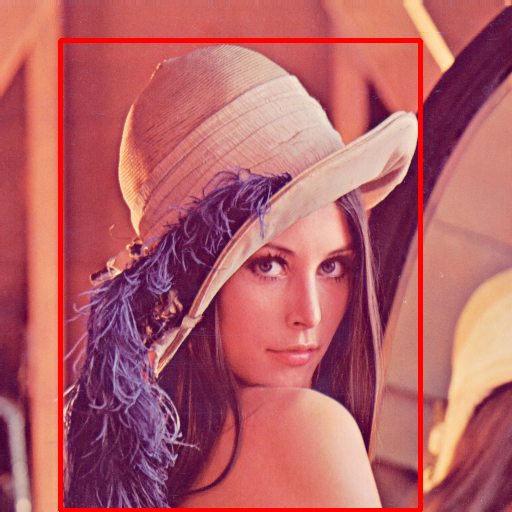

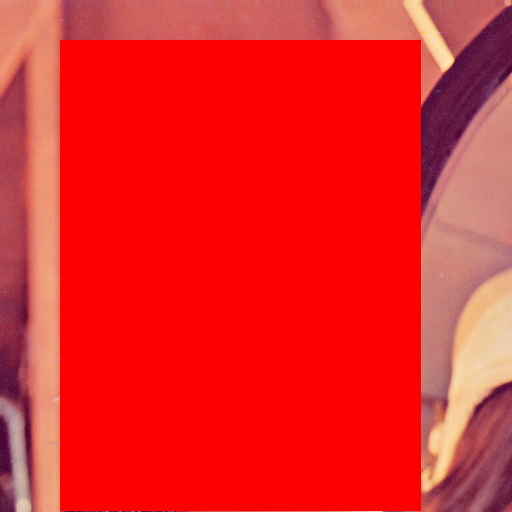

In [ ]:
img_rect = img.copy()
cv2.rectangle(img_rect, (60, 40), (420, 510), (0, 0, 255), 3)

cv2_imshow(img_rect)

img_rect = img.copy()
cv2.rectangle(img_rect, (60, 40), (420, 510), (0, 0, 255), -5)

cv2_imshow(img_rect)

## Hint: 線

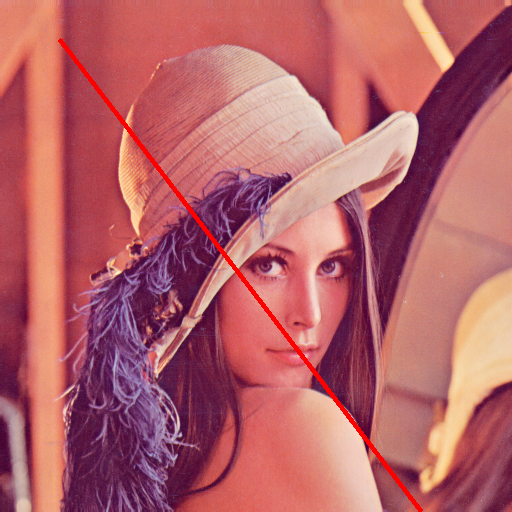

In [ ]:
img_line = img.copy()
cv2.line(img_line, (60, 40), (420, 510), (0, 0, 255), 3)
cv2_imshow(img_line)

## Hint: 文字

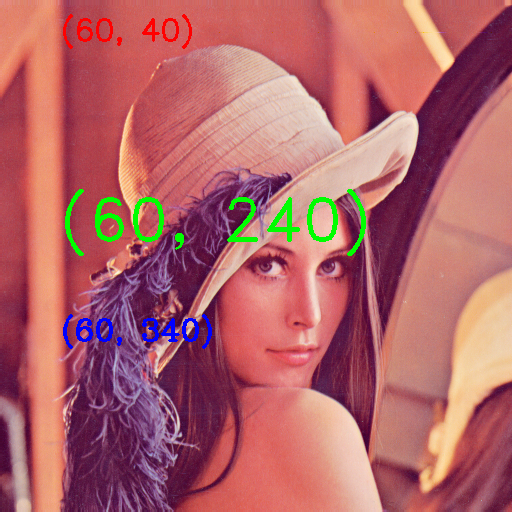

In [ ]:
img_text = img.copy()
cv2.putText(img_text, '(60, 40)', (60, 40), 0, 1, (0, 0, 255), 2)
cv2.putText(img_text, '(60, 240)', (60, 240), 2, 2, (0, 255,0), 2)
cv2.putText(img_text, '(60, 340)', (60, 340), 3, 1, (255,0,0), 2)

cv2_imshow(img_text)

##  解法二

如果希望得知矩型邊框的位置

1. 顏色的操作 (對明亮度做直方圖均衡)
2. 鏡像可以透過四則運算得知
3. 透過建構 transformation matrix 做縮放
4. 把矩型邊框的點與 transformation matrix 相乘就會得到縮放後的位置
5. 畫圖

得到的圖的結果正確，同時也知道新的矩型邊框座標點

(512, 512, 3)


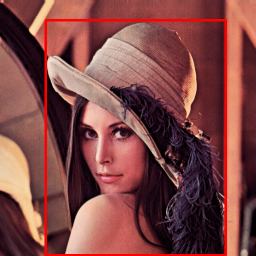

In [ ]:
img_rect = img.copy()
cv2.rectangle(img_rect, (60, 40), (420, 510), (0, 0, 255), 3)

img_hw = img_rect.copy()
point1 = [60, 40]
point2 = [420, 510]

"""
對明亮度做直方圖均衡
"""
img_hsv = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)
img_hsv[...,-1] = cv2.equalizeHist(img_hsv[...,-1])
img_hw = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
print(img_hw.shape) # (512, 512, 3)
"""
水平鏡像
"""
img_hw = img_hw[:,::-1,:]

"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
img_hw = cv2.resize(img_hw, None, fx=fx, fy=fy, interpolation = cv2.INTER_AREA)

cv2_imshow(img_hw)

(512, 512, 3)


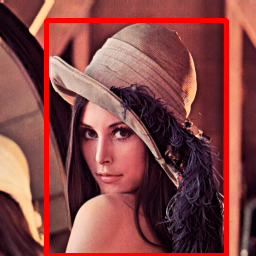

'\n"""\n水平鏡像\n"""\nh, w = img_hw.shape[:2]\n\n# 圖片鏡像\nimg_hw = \n\n# 透過四則運算計算鏡像後位置\n# 確保點的位置一樣是左上跟右下，所以交換鏡像後的 x 座標 (y 座標做水平鏡像後位置不變)\npoint1[0] = \npoint2[0] = \n\n"""\n縮放處理 (0.5 倍)\n"""\nfx = 0.5\nfy = 0.5\nresize_col = int(img_hw.shape[1]*fx)\nresize_row = int(img_hw.shape[0]*fy)\n\n# 建構 scale matrix\nM_scale = np.array()\nimg_hw = cv2.warpAffine(...)\n\n# 把左上跟右下轉為矩陣型式\nbbox = np.array((point1, point2), dtype=np.float32)\n#print(\'M_scale.shape={}, bbox.shape={}\'.format(M_scale.shape, bbox.shape))\n\n# 做矩陣乘法可以使用 `np.dot`, 為了做矩陣乘法, M_scale 需要做轉置之後才能相乘\nhomo_coor_result = np.dot(M_scale.T, bbox)\nhomo_coor_result = homo_coor_result.astype(\'uint8\')\n#print(homo_coor_result)\nscale_point1 = tuple(homo_coor_result[0])\nscale_point2 = tuple(homo_coor_result[1])\nprint(\'origin point1={}, origin point2={}\'.format(point1, point2))\nprint(\'resize point1={}, resize point2={}\'.format(scale_point1, scale_point2))\n\n# 畫圖\ncv2.rectangle(img_hw, scale_point1, scale_point2, (0, 0, 255), 3)\n\n

In [ ]:
img_hw = img.copy()
point1 = [60, 40]
point2 = [420, 510]

"""
對明亮度做直方圖均衡
"""
img_hsv = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)
img_hsv[...,-1] = cv2.equalizeHist(img_hsv[...,-1])
img_hw = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
print(img_hw.shape) # (512, 512, 3)
h, w = img_hw.shape[0], img_hw.shape[1]
"""
水平鏡像
"""
img_hw = img_hw[:,::-1,:]

"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
img_hw = cv2.resize(img_hw, None, fx=fx, fy=fy, interpolation = cv2.INTER_AREA)

# frame ## 以為很簡單， But ~~  原圖的左上，右下 變成了 右上，左下 
# (x1, y1)             ===>             (w-x1, y1)
#         (x2, y2)     ===>     (w-x2, y2)
#                                         ===> (w-x2, y1) 
#                                         ===>            (w-x1, y2)  
point2[0] = w - point2[0]
point1[0] = w - point1[0]
point1[0], point2[0] = point2[0], point1[0]
point1[0], point1[1], point2[0], point2[1] = int(point1[0]/2), int(point1[1]/2), int(point2[0]/2), int(point2[1]/2)
img_hw = cv2.rectangle(img_hw, (point1[0], point1[1]), (point2[0],point2[1]), [0,0,255],3)
cv2_imshow(img_hw)


'''

# 原始 BGR 圖片轉 HSV 圖片
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)

# 對明亮度做直方圖均衡 -> 對 HSV 的 V 做直方圖均衡

# 將圖片轉回 BGR
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_HSV2BGR)
'''
'''
"""
水平鏡像
"""
h, w = img_hw.shape[:2]

# 圖片鏡像
img_hw = 

# 透過四則運算計算鏡像後位置
# 確保點的位置一樣是左上跟右下，所以交換鏡像後的 x 座標 (y 座標做水平鏡像後位置不變)
point1[0] = 
point2[0] = 

"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
resize_col = int(img_hw.shape[1]*fx)
resize_row = int(img_hw.shape[0]*fy)

# 建構 scale matrix
M_scale = np.array()
img_hw = cv2.warpAffine(...)

# 把左上跟右下轉為矩陣型式
bbox = np.array((point1, point2), dtype=np.float32)
#print('M_scale.shape={}, bbox.shape={}'.format(M_scale.shape, bbox.shape))

# 做矩陣乘法可以使用 `np.dot`, 為了做矩陣乘法, M_scale 需要做轉置之後才能相乘
homo_coor_result = np.dot(M_scale.T, bbox)
homo_coor_result = homo_coor_result.astype('uint8')
#print(homo_coor_result)
scale_point1 = tuple(homo_coor_result[0])
scale_point2 = tuple(homo_coor_result[1])
print('origin point1={}, origin point2={}'.format(point1, point2))
print('resize point1={}, resize point2={}'.format(scale_point1, scale_point2))

# 畫圖
cv2.rectangle(img_hw, scale_point1, scale_point2, (0, 0, 255), 3)

while True:
    cv2.imshow('image', img_hw)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break
'''